In [244]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from dl_init import sigmoid,relu,compute_loss,forward_propagation,backward_propagation
from dl_init import update_parameters,predict,load_dataset,plot_decision_boundary,predict_dec

plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X,train_Y,test_X,test_Y = load_dataset()

In [245]:
def model(X,Y,learning_rate = 0.01,num_iterations =15000,print_cost = True,initialization = "he"):
    
   # global parameters
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0,num_iterations):
        a3,cache = forward_propagation(X,parameters)
        
        cost = compute_loss(a3,Y)
        
        grads = backward_propagation(X,Y,cache)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%1000 == 0:
            print "Cost after iteration{}:{}".format(i,cost)
            costs.append(cost)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations(per hundreds)')
    plt.title("learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters

    

In [246]:
def initialize_parameters_zeros(layers_dims):
    
    parameters = {}
    L = len(layers_dims)
    for l in range(1,L):
        parameters['W'+str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b'+str(l)] = np.zeros((layers_dims[l],1))
    return parameters


Cost after iteration0:0.69314718056
Cost after iteration1000:0.69314718056
Cost after iteration2000:0.69314718056
Cost after iteration3000:0.69314718056
Cost after iteration4000:0.69314718056
Cost after iteration5000:0.69314718056
Cost after iteration6000:0.69314718056
Cost after iteration7000:0.69314718056
Cost after iteration8000:0.69314718056
Cost after iteration9000:0.69314718056
Cost after iteration10000:0.69314718056
Cost after iteration11000:0.69314718056
Cost after iteration12000:0.69314718056
Cost after iteration13000:0.69314718056
Cost after iteration14000:0.69314718056


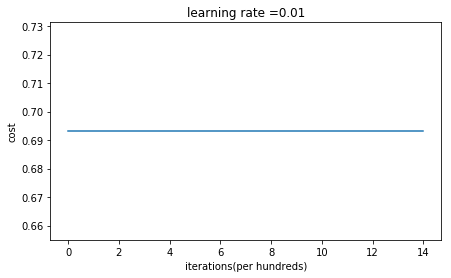

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [248]:
parameters = model(train_X,train_Y,initialization = "zeros")
print "On the train set:"
predictions_train = predict(train_X,train_Y,parameters)
print "On the test set:"
predictions_test = predict(test_X,test_Y,parameters)

In [251]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.reshape(X[0,:].shape), cmap=plt.cm.Spectral)
    plt.show()

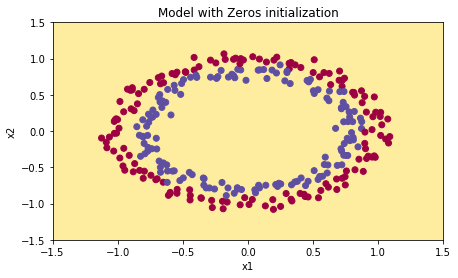

In [252]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [205]:
print "predictions_train = "+str(predictions_train)
print "predictions_test = "+str(predictions_test)

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [206]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*10
        parameters['b'+str(l)] = np.random.randn(layers_dims[l],1)*10
    return parameters 

In [207]:
parameters = initialize_parameters_random([3,2,1])

Cost after iteration0:inf
Cost after iteration1000:1.90591185328
Cost after iteration2000:0.809294207478
Cost after iteration3000:0.613327349838
Cost after iteration4000:0.5521462112
Cost after iteration5000:0.481369795628
Cost after iteration6000:0.449992434679
Cost after iteration7000:0.427031719288
Cost after iteration8000:0.420124957846
Cost after iteration9000:0.417372349215
Cost after iteration10000:0.405332954589
Cost after iteration11000:0.40413959203
Cost after iteration12000:0.403121636813
Cost after iteration13000:0.397979874956
Cost after iteration14000:0.386313638273


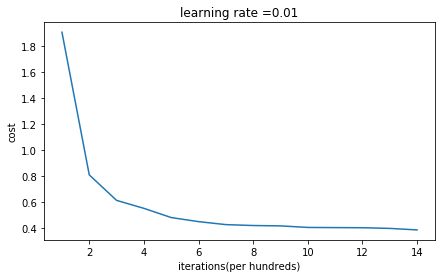

On the train set:
Accuracy: 0.78
On the test set:
Accuracy: 0.77


In [216]:
parameters = model(train_X,train_Y,initialization = "random")
print "On the train set:"
predictions_train = predict(train_X,train_Y,parameters)
print "On the test set:"
predictions_test = predict(test_X,test_Y,parameters)

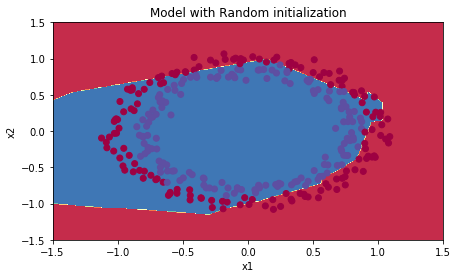

In [217]:
plt.title("Model with Random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [210]:
print predictions_train
print predictions_test

[[1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0
  0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1
  1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1
  1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1
  1 1 1 0]]
[[1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0
  1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
  1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0]]


In [211]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L =len(layers_dims)
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b'+str(l)] = np.random.randn(layers_dims[l],1)*np.sqrt(2./layers_dims[l-1])
    return parameters    

In [212]:
parameters = initialize_parameters_he([2,4,1])

Cost after iteration0:1.29747147613
Cost after iteration1000:0.603665408
Cost after iteration2000:0.554395173494
Cost after iteration3000:0.43808589076
Cost after iteration4000:0.298202279101
Cost after iteration5000:0.20708443904
Cost after iteration6000:0.151584518578
Cost after iteration7000:0.116673166308
Cost after iteration8000:0.0950602479803
Cost after iteration9000:0.0804919408238
Cost after iteration10000:0.0706740260802
Cost after iteration11000:0.0636969115523
Cost after iteration12000:0.0583624620313
Cost after iteration13000:0.0540659651754
Cost after iteration14000:0.0505585204029


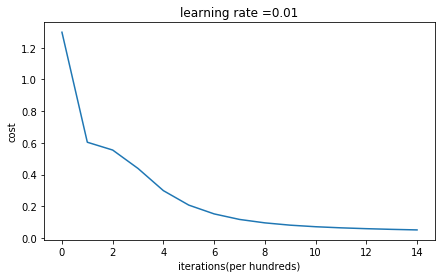

On the train set:
Accuracy: 0.99
On the test set:
Accuracy: 0.93


In [213]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

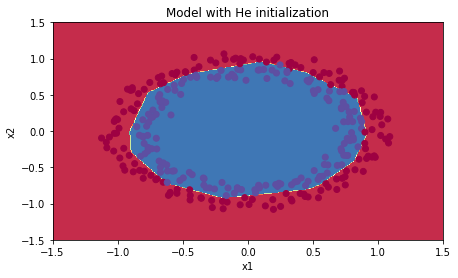

In [214]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)